In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import find_peaks,peak_widths
from skimage.restoration import denoise_bilateral,denoise_wavelet,denoise_tv_chambolle,estimate_sigma

[  0   1   2   3   5   6   7   8  10  11  12  14  15  16  17  19  20  21
  22  24  25  26  28  29  30  31  33  34  35  36  38  39  40  42  43  44
  45  47  48  49  51  52  53  54  56  57  58  59  61  62  63  65  66  67
  68  70  71  72  73  75  76  77  79  80  81  82  84  85  86  87  89  90
  91  93  94  95  96  98  99 100 102 103 104 105 107 108 109 110 112 113
 114 116 117 118 119 121 122 123 124 126 127 128 130 131 132 133 135 136
 137 138 140 141 142 144 145 146 147 149 150 151 153 154 155 156 158 159
 160 161 163 164 165 167 168 169 170 172 173 174 175 177 178 179 181 182
 183 184 186 187 188 189 191 192 193 195 196 197 198 200 201 202 204 205
 206 207 209 210 211 212 214 215 216 218 219 220 221 223 224 225 226 228
 229 230 232 233 234 235 237 238 239 240 242 243 244 246 247 248 249 251
 252 253 255]


([], <a list of 0 Text yticklabel objects>)

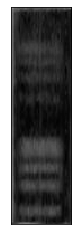

In [3]:
npImage=np.array(Image.open("./denoisedImage_cropped.jpg").convert("L"))

# Get brightness range - i.e. darkest and lightest pixels
min=np.min(npImage)        # result=144
max=np.max(npImage)        # result=216

# Make a LUT (Look-Up Table) to translate image values
LUT=np.zeros(256,dtype=np.uint8)
LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True,dtype=np.uint8)
print(LUT[min:max+1])
# Apply LUT and save resulting image
contrastedImg =np.array(Image.fromarray(LUT[npImage]))
plt.imshow(contrastedImg,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

In [4]:
print(contrastedImg.shape[0],contrastedImg.shape[1],sep=" ")

195 54


In [6]:
middle_col_1 = (int) (contrastedImg.shape[1]/2)
print(middle_col_1)

27


In [7]:
middle_col_img = np.array(contrastedImg[:,middle_col_1-1:middle_col_1+1])
print(middle_col_img.ndim)
plt.imshow(middle_col_img,cmap="gray",interpolation="nearest")
plt.xticks([])
plt.yticks([])

2


([], <a list of 0 Text yticklabel objects>)

In [8]:
middle_col_img_avg = np.average(middle_col_img,axis=1)
print(middle_col_img_avg.ndim,sep=" ")

1


In [31]:
#finding peaks
min_peak_height = 40
max_peak_height = 100
peaks = find_peaks(middle_col_img_avg,height=(min_peak_height,max_peak_height),distance=10)
print(peaks[0])

[ 39  51  62  84 128 145 161 184]


In [35]:
#find width
results_half = peak_widths(middle_col_img_avg, peaks[0], rel_height=0.5)
print(*results_half[1:])

[46.25 49.   43.75 36.   56.25 63.75 56.   50.5 ] [ 32.375       48.5         59.125       77.         117.76315789
 141.17857143 155.70588235 179.4375    ] [ 44.25        53.125       64.625       86.11111111 135.17857143
 147.25       164.5625     186.8       ]


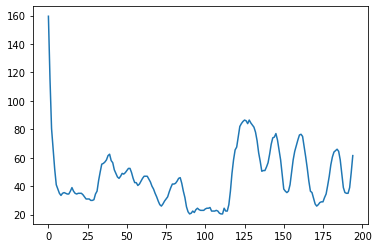

In [11]:
plt.plot(middle_col_img_avg)

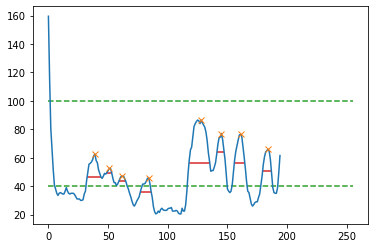

In [36]:
plt.plot(np.arange(0,middle_col_img_avg.shape[0],step=1),middle_col_img_avg)
plt.hlines(max_peak_height,0,255,colors="C2",linestyles="dashed")
plt.hlines(min_peak_height,0,255,colors="C2",linestyles="dashed")
plt.hlines(*results_half[1:], color="C3")
plt.plot(peaks[0],middle_col_img_avg[peaks[0]],'x')